In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.093394,-0.057896,1.000000,0.168454,0.101831,-0.113134,0.995313,0.090134,0.198099,-0.156436,0.283403,0.056167,-0.217598
sex,-0.093394,1.000000,-0.060061,-0.093394,-0.106264,0.046542,-0.067467,-0.085886,0.156938,0.143898,-0.051792,0.129466,0.226361,-0.288945
cp,-0.057896,-0.060061,1.000000,-0.057896,-0.068333,0.087795,0.050315,-0.064804,-0.398816,-0.127340,0.098096,-0.171534,-0.177390,0.422445
trestbps,1.000000,-0.093394,-0.057896,1.000000,0.168454,0.101831,-0.113134,0.995313,0.090134,0.198099,-0.156436,0.283403,0.056167,-0.217598
chol,0.168454,-0.106264,-0.068333,0.168454,1.000000,0.036223,-0.119340,0.178582,0.072629,-0.028891,0.026902,0.070440,0.079837,-0.100692
fbs,0.101831,0.046542,0.087795,0.101831,0.036223,1.000000,-0.060872,0.111008,0.025663,-0.009922,-0.052375,0.127770,-0.035011,-0.019770
restecg,-0.113134,-0.067467,0.050315,-0.113134,-0.119340,-0.060872,1.000000,-0.120296,-0.102509,-0.055052,0.090536,-0.051365,-0.004685,0.144351
thalach,0.995313,-0.085886,-0.064804,0.995313,0.178582,0.111008,-0.120296,1.000000,0.093351,0.198921,-0.161045,0.276731,0.059556,-0.222584
exang,0.090134,0.156938,-0.398816,0.090134,0.072629,0.025663,-0.102509,0.093351,1.000000,0.286918,-0.254598,0.117303,0.190785,-0.439581
oldpeak,0.198099,0.143898,-0.127340,0.198099,-0.028891,-0.009922,-0.055052,0.198921,0.286918,1.000000,-0.564246,0.205515,0.205314,-0.419422


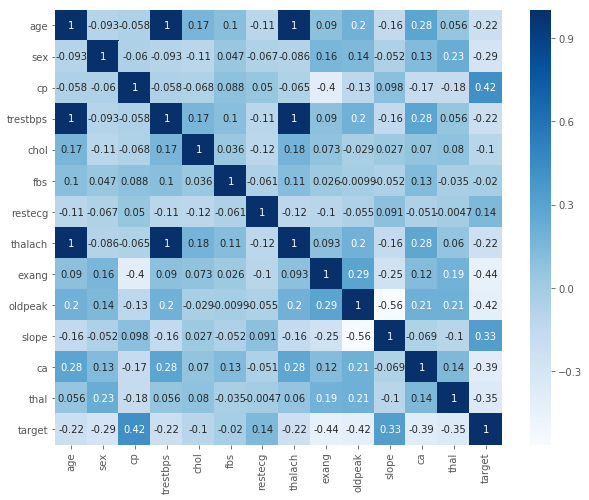

In [46]:
#看相关系数
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='Blues')

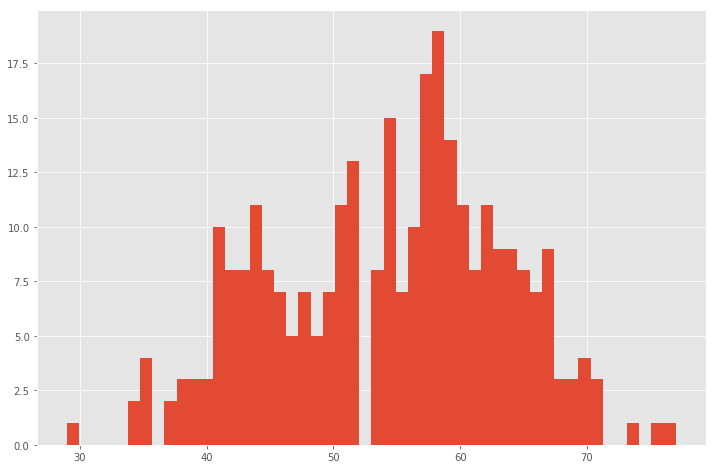

In [17]:
def outlier_iqr(df, columns=None):
    if columns == None:
        columns = df.columns

    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        #四分位範囲
        iqr = q3 - q1 
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        # 範囲から外れている値を除く
        df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
    return df

#df["trestbps"]=np.log1p(df["trestbps"])
df["trestbps"]=df[df["trestbps"]<250]

df=outlier_iqr(df,columns=["trestbps"])
plt.figure(figsize=(12,8))
plt.hist(df["trestbps"],bins=50)
plt.show()

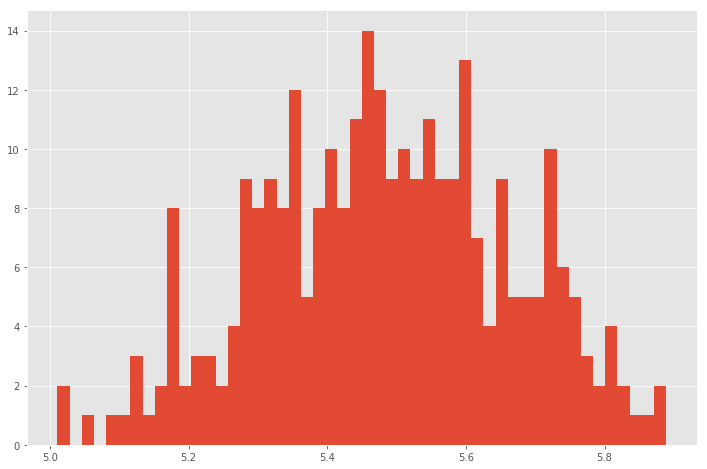

In [20]:
df["chol"]=np.log1p(df["chol"])
#df["trestbps"]=df[df["trestbps"]<250]

df=outlier_iqr(df,columns=["chol"])
plt.figure(figsize=(12,8))
plt.hist(df["chol"],bins=50)
plt.show()

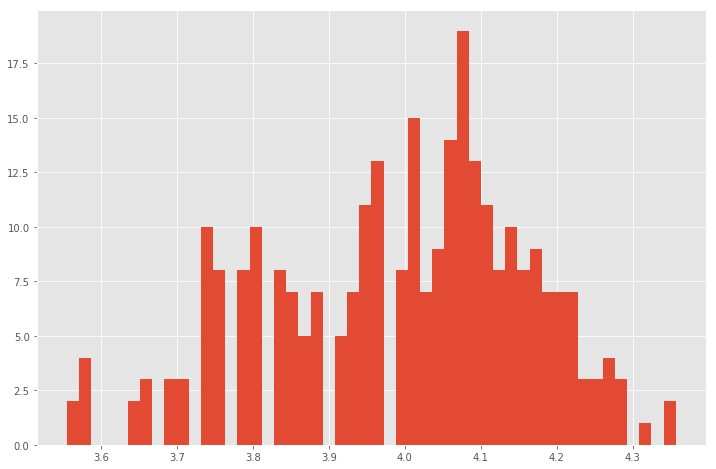

In [26]:
#df["thalach"]=np.log1p(df["thalach"])
#df["thalach"]=df[df["thalach"]<150]

df=outlier_iqr(df,columns=["thalach"])
plt.figure(figsize=(12,8))
plt.hist(df["thalach"],bins=50)
plt.show()

In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import re
#解决ValueError: feature_names may not contain [, ] or <
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]
X=df.drop(columns={"target"})
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
params={
    "silent":1,
    "max_depth":6,
    "min_child_weight":1,
    "eta":0.1,
    "tree_method":"exact",
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "predictor":"cpu_predictor"
    
}

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)

model=xgb.train(params=params,
               dtrain=dtrain,
               num_boost_round=1000,
               early_stopping_rounds=5,
               evals=[(dtest,"test")])


[0]	test-logloss:0.645073
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.605715
[2]	test-logloss:0.571158
[3]	test-logloss:0.538628
[4]	test-logloss:0.511992
[5]	test-logloss:0.496598
[6]	test-logloss:0.476152
[7]	test-logloss:0.459206
[8]	test-logloss:0.440005
[9]	test-logloss:0.425538
[10]	test-logloss:0.409609
[11]	test-logloss:0.395722
[12]	test-logloss:0.382702
[13]	test-logloss:0.375984
[14]	test-logloss:0.365499
[15]	test-logloss:0.359489
[16]	test-logloss:0.351606
[17]	test-logloss:0.346452
[18]	test-logloss:0.340062
[19]	test-logloss:0.336508
[20]	test-logloss:0.332565
[21]	test-logloss:0.333409
[22]	test-logloss:0.330832
[23]	test-logloss:0.327074
[24]	test-logloss:0.32754
[25]	test-logloss:0.325352
[26]	test-logloss:0.324078
[27]	test-logloss:0.321685
[28]	test-logloss:0.324272
[29]	test-logloss:0.323794
[30]	test-logloss:0.322432
[31]	test-logloss:0.321205
[32]	test-logloss:0.319782
[33]	test-logloss:0.318902
[34]	test-logloss:0.319268
[35]	te

In [44]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(xgb.DMatrix(X_test),ntree_limit=model.best_ntree_limit)
predictions=[round(pred) for pred in y_pred]

acc=accuracy_score(y_test,predictions)
print(round(acc*100,2))
print(predictions)
print(y_test)

91.23
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
127    1
66     1
95     1
261    0
260    0
227    0
215    0
298    0
15     1
22     1
86     1
283    0
12     1
234    0
61     1
167    0
284    0
143    1
46     1
146    1
163    1
244    0
295    0
229    0
155    1
159    1
94     1
169    0
214    0
270    0
135    1
8      1
5      1
80     1
253    0
131    1
107    1
7      1
168    0
114    1
65     1
225    0
218    0
236    0
57     1
232    0
98     1
184    0
296    0
287    0
77     1
78     1
230    0
20     1
47     1
204    0
219    0
Name: target, dtype: int64


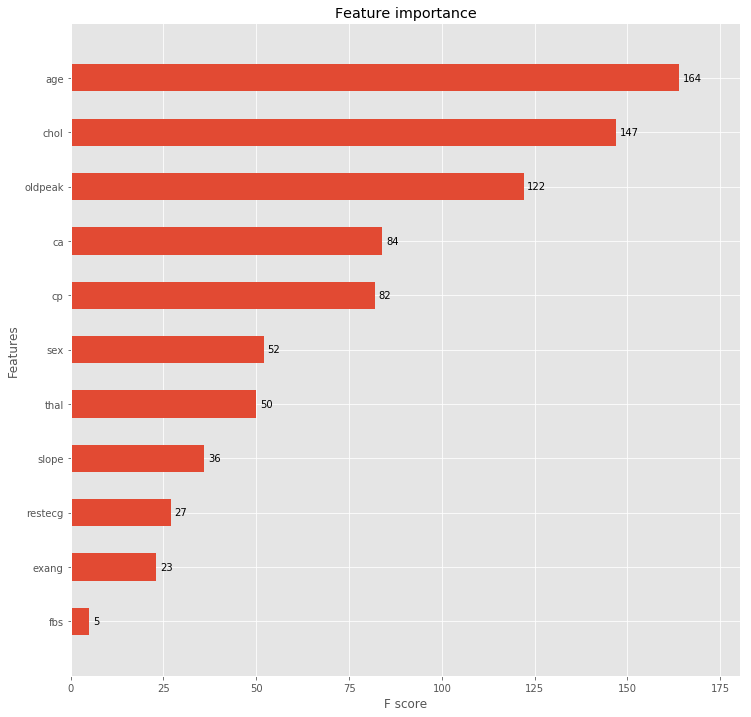

In [29]:
fig,ax=plt.subplots(figsize=(12,12))
xgb.plot_importance(model,max_num_features=20,height=0.5,ax=ax)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,\
AdaBoostClassifier,GradientBoostingClassifier

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def predict(self, x):
        return self.clf.predict(x) 
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
#尝试不同params
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

etc_params = {
    'n_jobs': -1,
    'n_estimators':500,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 1
}

ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

gbc_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}
rfc=SklearnHelper(RandomForestClassifier,seed=0,params=rfc_params).fit(X_train,y_train)
etc=SklearnHelper(ExtraTreesClassifier,seed=0,params=etc_params).fit(X_train,y_train)
ada=SklearnHelper(AdaBoostClassifier,seed=0,params=ada_params).fit(X_train,y_train)
gbc=SklearnHelper(GradientBoostingClassifier,seed=0,params=gbc_params).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished


      Iter       Train Loss   Remaining Time 
         1           1.2292            0.00s
         2           1.1116            0.00s
         3           1.0054            0.00s
         4           0.9197            0.00s
         5           0.8396            0.00s
         6           0.7675            0.00s
         7           0.7068            0.00s
         8           0.6550            0.00s
         9           0.6050            0.85s
        10           0.5628            0.77s
        20           0.2861            0.37s
        30           0.1634            0.49s
        40           0.0982            0.36s
        50           0.0596            0.48s
        60           0.0370            0.39s
        70           0.0236            0.42s
        80           0.0157            0.36s
        90           0.0105            0.39s
       100           0.0069            0.34s
       200           0.0004            0.23s
       300           0.0004            0.11s
       40

In [31]:
rfc_pred = rfc.predict_proba(X_train)
etc_pred = etc.predict_proba(X_train)
ada_pred = ada.predict_proba(X_train)
gbc_pred = gbc.predict_proba(X_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


In [32]:
preds_train = pd.DataFrame({'rfc_pred': rfc_pred[:, 1],
                             'etc_pred': etc_pred[:, 1],
                             'ada_pred': ada_pred[:, 1],
                             'gbc_pred': gbc_pred[:, 1]})

#preds_train_array=np.load("preds_train.npy")
#preds_train=pd.DataFrame(preds_train_array,columns=["rfc_pred","etc_pred","ada_pred","gbc_pred"])
preds_train.head()

,ada_pred,etc_pred,gbc_pred,rfc_pred
0,0.495796,0.351370,0.000671,0.387075
1,0.497707,0.507141,0.000683,0.526084
2,0.488579,0.044879,0.000003,0.063057
3,0.507957,0.907608,0.999981,0.952578
4,0.488588,0.657053,0.000332,0.542217


In [35]:
rfc_test = rfc.predict_proba(X_test)
etc_test = etc.predict_proba(X_test)
ada_test = ada.predict_proba(X_test)
gbc_test = gbc.predict_proba(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


In [36]:
preds_test = pd.DataFrame({'rfc_pred': rfc_test[:, 1],
                             'etc_pred': etc_test[:, 1],
                             'ada_pred': ada_test[:, 1],
                             'gbc_pred': gbc_test[:, 1]})

#preds_train_array=np.load("preds_train.npy")
#preds_train=pd.DataFrame(preds_train_array,columns=["rfc_pred","etc_pred","ada_pred","gbc_pred"])
preds_test.head()

,ada_pred,etc_pred,gbc_pred,rfc_pred
0,0.499924,0.918958,0.999993,0.858498
1,0.504988,0.624804,0.999869,0.774335
2,0.501688,0.336708,0.747740,0.489606
3,0.502130,0.625586,0.035916,0.597338
4,0.496114,0.154964,0.000039,0.161956


In [37]:
params={
    "silent":1,
    "max_depth":6,
    "min_child_weight":1,
    "eta":0.1,
    "tree_method":"exact",
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "predictor":"cpu_predictor"
    
}

dtrain=xgb.DMatrix(preds_train,label=y_train)
dtest=xgb.DMatrix(preds_test,label=y_test)

model=xgb.train(params=params,
               dtrain=dtrain,
               num_boost_round=1000,
               early_stopping_rounds=5,
               evals=[(dtest,"test")])

[0]	test-logloss:0.624942
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.570793
[2]	test-logloss:0.527324
[3]	test-logloss:0.492213
[4]	test-logloss:0.463794
[5]	test-logloss:0.44083
[6]	test-logloss:0.422376
[7]	test-logloss:0.407693
[8]	test-logloss:0.396194
[9]	test-logloss:0.387405
[10]	test-logloss:0.380935
[11]	test-logloss:0.37646
[12]	test-logloss:0.373709
[13]	test-logloss:0.372453
[14]	test-logloss:0.372495
[15]	test-logloss:0.373666
[16]	test-logloss:0.37582
[17]	test-logloss:0.37883
[18]	test-logloss:0.382582
Stopping. Best iteration:
[13]	test-logloss:0.372453



In [40]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xgb.DMatrix(preds_test), ntree_limit=model.best_ntree_limit)
prediction = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, prediction)
print(round(acc * 100, 2))
print(prediction)
print(y_test)

87.72
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
127    1
66     1
95     1
261    0
260    0
227    0
215    0
298    0
15     1
22     1
86     1
283    0
12     1
234    0
61     1
167    0
284    0
143    1
46     1
146    1
163    1
244    0
295    0
229    0
155    1
159    1
94     1
169    0
214    0
270    0
135    1
8      1
5      1
80     1
253    0
131    1
107    1
7      1
168    0
114    1
65     1
225    0
218    0
236    0
57     1
232    0
98     1
184    0
296    0
287    0
77     1
78     1
230    0
20     1
47     1
204    0
219    0
Name: target, dtype: int64
